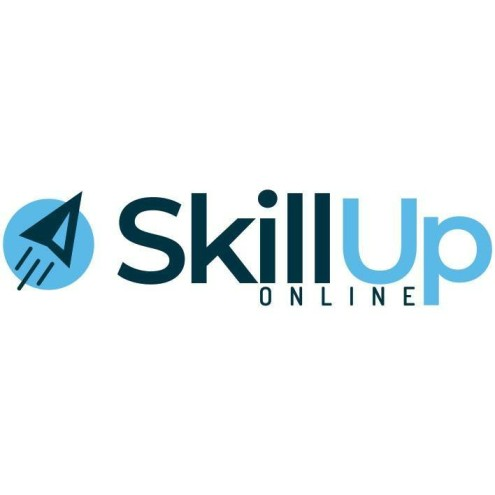

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [73]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

In [58]:
# Organizar los datos en un dataframe
df=pd.read_csv(r"C:\Users\silvi\Downloads\archive (13)\creditcard.csv")
df
#df.dtypes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [82]:
#Escribe tu código aquí. SGC Comentario: No hay valores perdidos
Per=df.isnull().sum()
#df.dropna(inplace=True)


In [80]:
dfrau=df[(df['Class']==1)]


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [81]:
#Escribe tu código aquí. SGC comentario: Hay 1081 datos duplicados 284807 - 283726 = 1081
duplicate_count=df.duplicated().sum()
duplicate_count
dfc=df.drop_duplicates()


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [62]:
# Calcula el porcentaje de transacciones fraudulentas
Frau=(dfc['Class']==1).sum()
TotalT=dfc['Class'].count()
# Muestra el porcentaje de transacciones fraudulentas
print(f"el porcentaje de transacciones fraudulentas es: {(Frau/TotalT)*100}")

el porcentaje de transacciones fraudulentas es: 0.1667101358352777


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [63]:
# Calcula el importe medio de las transacciones fraudulentas
dfrau=dfc[(dfc['Class']==1)]

frau_mean=dfrau['Amount'].mean()

# Muestra el importe medio de las transacciones fraudulentas
print(f"el importe medio de las transacciones fraudulentas: {round(frau_mean,2)}")

el importe medio de las transacciones fraudulentas: 123.87


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

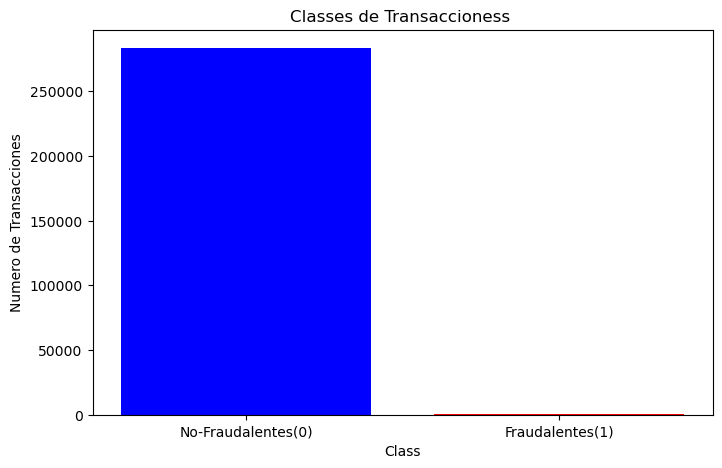

In [64]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
classC=dfc['Class'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(classC.index, classC.values, color=['blue','red'])
plt.xlabel('Class')
plt.ylabel('Numero de Transacciones')
plt.title('Classes de Transaccioness ')
plt.xticks([0,1], ['No-Fraudalentes(0)', 'Fraudalentes(1)'])
plt.show()
# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


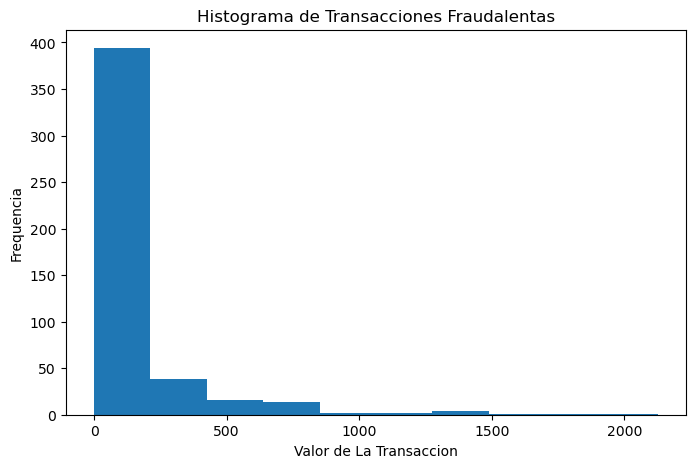

In [65]:
# Separa los datos de transacciones fraudulentas
dfrau=dfc[(dfc['Class']==1)]

# Muestra la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(8, 5))
plt.hist(dfrau['Amount'])
plt.xlabel('Valor de La Transaccion')
plt.ylabel('Frequencia')
plt.title('Histograma de Transacciones Fraudalentas')
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [66]:
# Separa los datos de entrenamiento y evaluación
import pandas as pd
from sklearn.model_selection import train_test_split
X = dfc.drop('Class', axis =1)
y = dfc['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [74]:
#Escribe tu código aquí

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score

model = RandomForestClassifier( n_estimators=5, max_depth=150, random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Calcular la exactitud general del modelo con los datos de evaluación.

In [88]:
accuracy=accuracy_score(y_test, y_pred)
round(accuracy*100,3)

99.947

In [76]:
report = classification_report(y_test, y_pred)


### Classification Report

In [77]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.94      0.71      0.81        90

    accuracy                           1.00     56746
   macro avg       0.97      0.86      0.90     56746
weighted avg       1.00      1.00      1.00     56746



### Confusion Matrix

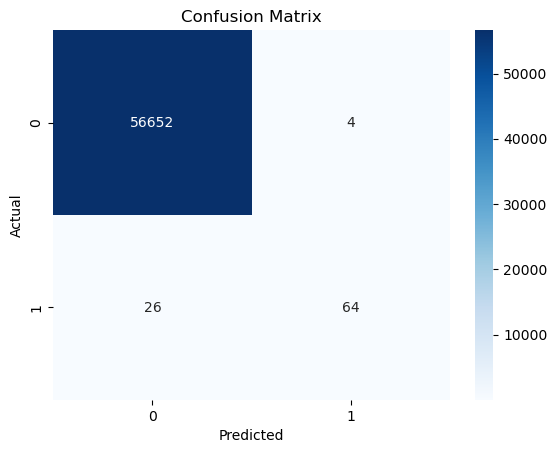

In [90]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Verdaderos Negativos (Class 0)=56652
Falsos Negativos =0.29×90=26

Falsos Positivos (Class 1) = 4
Verdaderos Positivos (Clase 1) = 0.71×90=64 


Class 0: 
precision 1, modelo predice class 0 con 100% de exactitud

Recall 1, modelo identifica todos los class 0 correctamente

f1-score 1, confirma que class 0 esta perfectamente clasificada.

Support 56656, modelo encontro 56656 de class 0 en el dataset test

Class 1:
Precision 0.94 , cuando el modelo predice class 1, es correcto 94% de las veces.
6% son falsos positivos

Recall:0.71, el modelo identifico 71% de las veces correctamente, lo que significa que el 29% de las veces class 1 son clasificadas incorrectamente, dado que no hay balance entre class 9 y class 1

F1-score:0.81, cuando el F1-score es bajo, indica que el modelo no clasifica la clase minoritaria class 1 debidamente.

Support 90, la clase 1 aparece solo 90 veces en el dataset test. 

Lo que indica que no hay balance entre las classes 1 y 0.

Observaciones:
Desbalance significativo de classes 1,0. El modelo funciona bien con clase 0 pero hay dificultades con clase 1.

Rendimiento en la clase 1: 
La precisión para la clase 1 es alta (94%), pero el recall es más bajo (71%). Modelo no detecta todos los casos verdaderos de la clase 1. 

In [21]:
!pip install matplotlib graphviz


Looking in indexes: https://packagemanager.posit.co/pypi/latest/simple


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>

In [22]:
from sklearn.tree import plot_tree

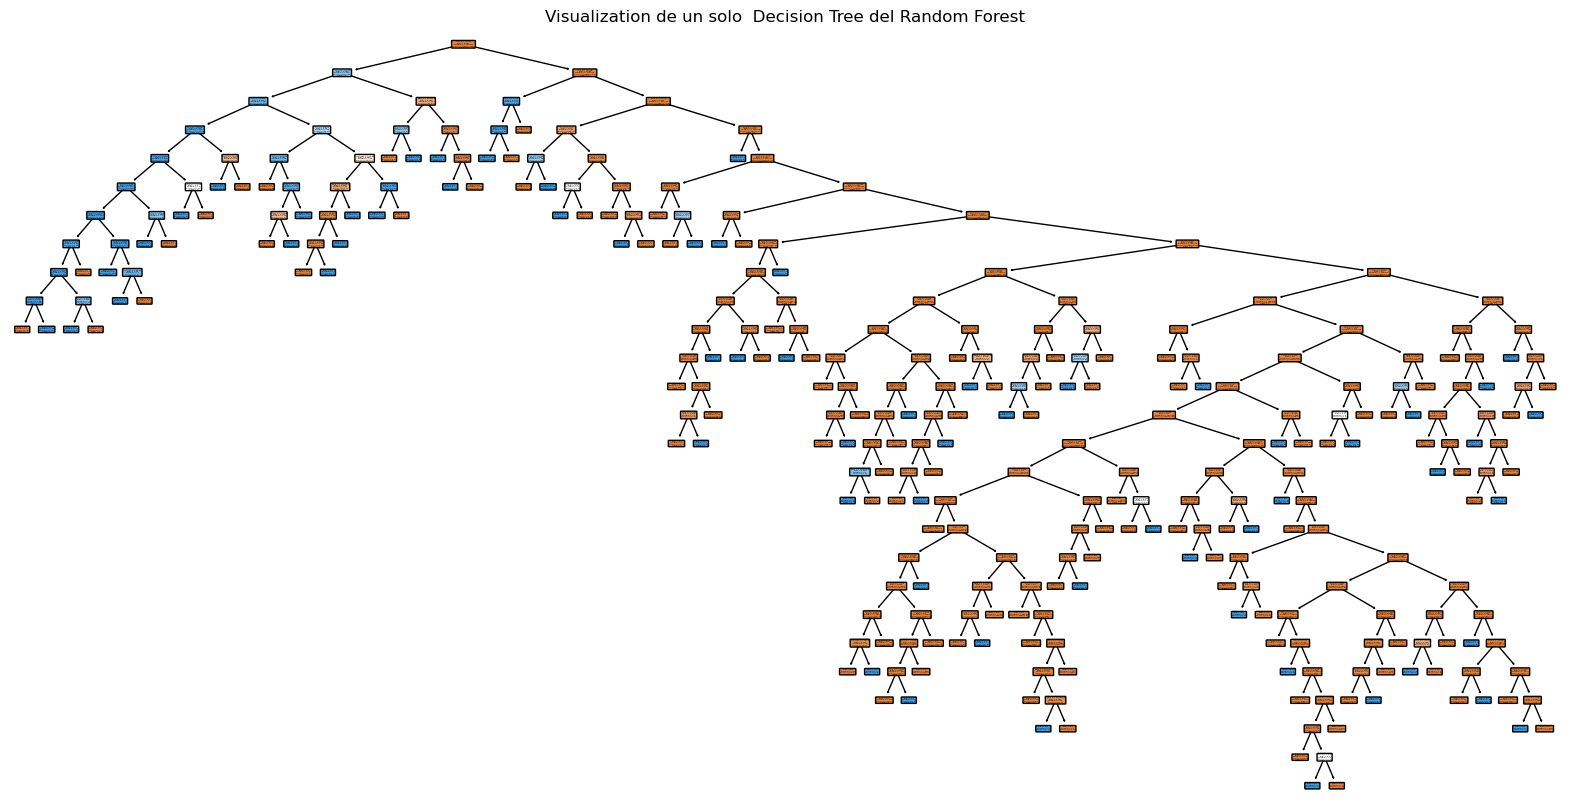

In [91]:
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.title('Visualization de un solo  Decision Tree del Random Forest')
plt.show()